<a href="https://colab.research.google.com/github/ShreekantMehta/hello-world/blob/master/StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#using RNN to pridict the stock price of apple company

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
df=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-03-20')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-16,259.079987,240.000000,241.949997,242.210007,80605900.0,242.210007
2020-03-17,257.609985,238.399994,247.509995,252.860001,81014000.0,252.860001
2020-03-18,250.000000,237.119995,239.770004,246.669998,75058400.0,246.669998


In [10]:
df.shape


(2067, 6)

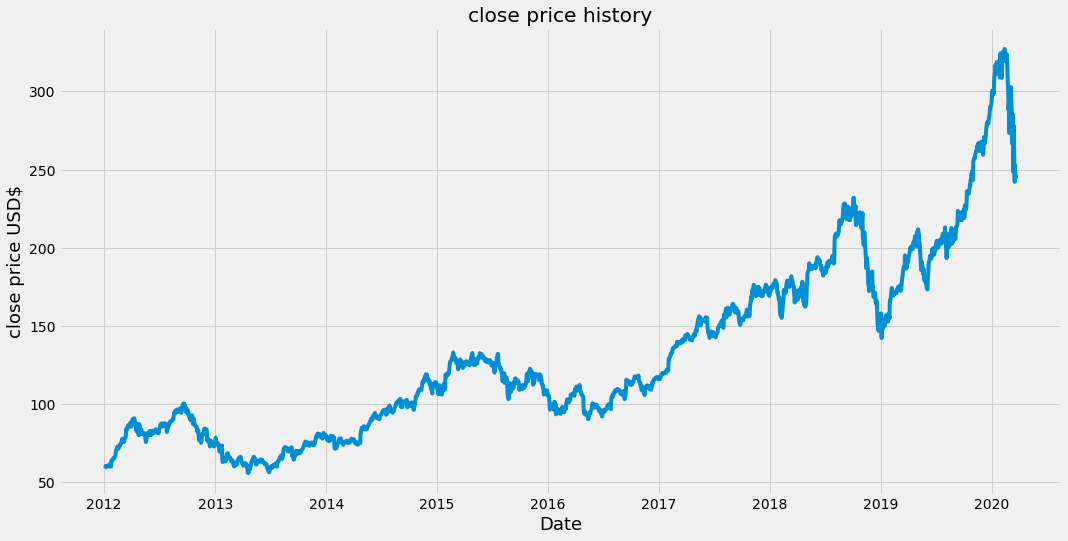

In [16]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD$', fontsize=18)
plt.show()

In [29]:
#create a new dataframe with only the "close coloumn"
data=df.filter(['Close'])
dataset = data.values
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1654

In [31]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.70329019],
       [0.69632655],
       [0.70317966]])

In [37]:
#creating the training dataset
#create the caled dataset
train_data = scaled_data[0:training_data_len,:]
#spilit the data into x_train and y_train data sets
x_train=[]
y_train=[] 
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0]) 
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]



In [0]:
#convert the x_train and y_train to numpy aarays
x_train,y_train=np.array(x_train),np.array(y_train)

In [39]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1594, 60, 1)

In [42]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [43]:
#compil ethe mode
model.compile(optimizer='adam',loss='mean_squared_error')


In [44]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1594/1594 [==============================] - 109s 69ms/step - loss: 5.9015e-04


In [0]:
#create the testing data set
#create a new aaray containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [0]:
#convert the data to a numpy aaray
x_test=np.array(x_test)

In [0]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
#get the model predicted price value
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

In [51]:
#get the root mean squared error
rmse=np.sqrt(np.mean(prediction-y_test)**2)
rmse

2.734249308957892

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

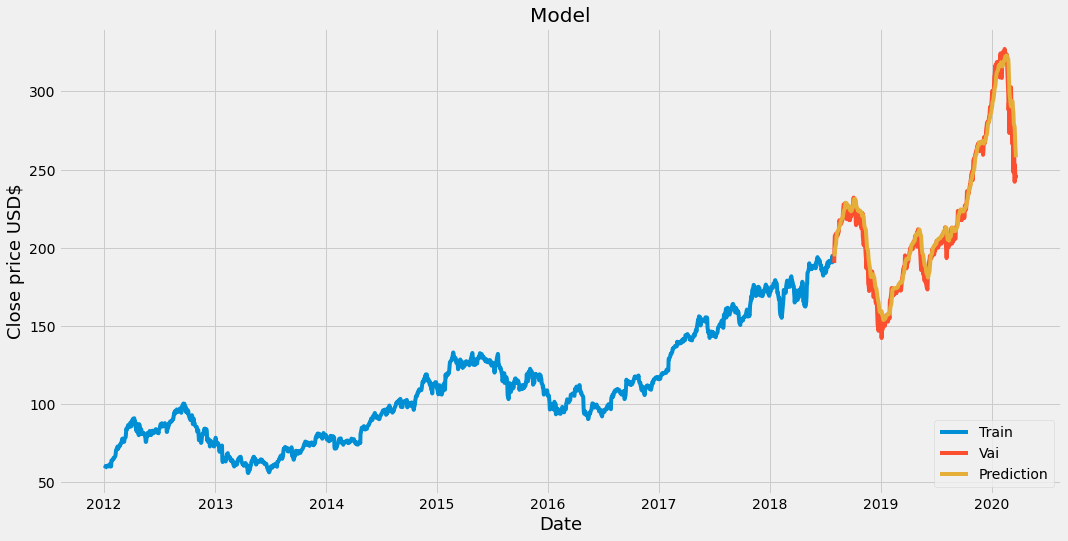

In [55]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction
#visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close price USD$",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","prediction"]])
plt.legend(["Train","Vai","Prediction"],loc="lower right")
plt.show

In [56]:
#show the valid and predicted price
valid

,Close,prediction
Date,,
2018-07-31,190.289993,196.092026
2018-08-01,201.500000,195.598648
2018-08-02,207.389999,196.791229
2018-08-03,207.990005,199.431656
2018-08-06,209.070007,202.443100
...,...,...
2020-03-16,242.210007,277.120392
2020-03-17,252.860001,271.186157
2020-03-18,246.669998,266.441650


In [60]:
#get the quote
apple_quote=web.DataReader("AAPL",data_source="yahoo",start="2012-01-01",end="2020-03-20")
#create a new data frame
new_df=apple_quote.filter(["Close"])
#get the last 60 days stock price and convert the values in to aaray
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
x_test=[]
#append the past 60 days 
x_test.append(last_60_days_scaled)
#convert the x_test data set to numpy
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(x_test)
#undo the scalling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)



[[253.9752]]


In [62]:

apple_quote2=web.DataReader("AAPL",data_source="yahoo",start="2019-12-18",end="2019-12-18")
print(apple_quote2["Close"])


Date
2019-12-18    279.73999
Name: Close, dtype: float64
